# Medals Predictions

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/shashwatsinghds/MedalsPrediction/refs/heads/main/teams.csv')

In [23]:
df.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [24]:
df.drop(columns=['country','prev_3_medals','height','weight'], axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2144 non-null   object 
 1   year         2144 non-null   int64  
 2   events       2144 non-null   int64  
 3   athletes     2144 non-null   int64  
 4   age          2144 non-null   float64
 5   medals       2144 non-null   int64  
 6   prev_medals  2014 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 117.4+ KB


In [26]:
df.describe()

,year,events,athletes,age,medals,prev_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,10.556437,10.248759
std,15.384205,49.490270,127.907577,2.808559,33.028143,31.951920
min,1964.000000,1.000000,1.000000,17.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,0.000000,0.000000
75%,2008.000000,44.000000,70.250000,26.100000,4.000000,4.000000
max,2016.000000,270.000000,839.000000,66.000000,442.000000,442.000000


In [27]:
df.isnull().sum()

,0
team,0
year,0
events,0
athletes,0
age,0
medals,0
prev_medals,130


<Axes: >

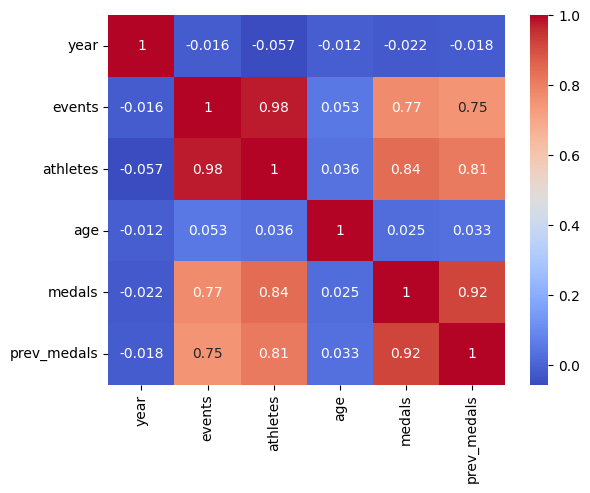

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap=sns.color_palette("coolwarm", as_cmap=True))

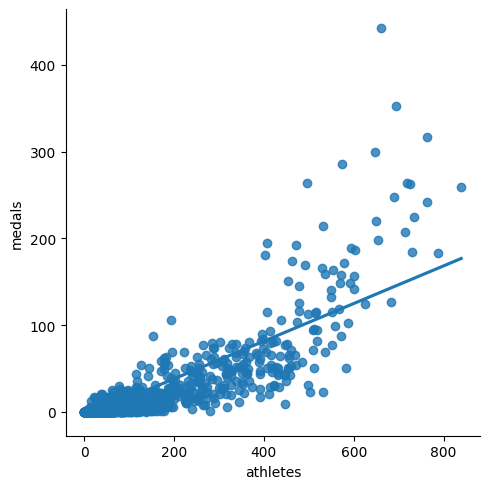

In [32]:
sns.lmplot(data=df, x='athletes', y='medals', ci=None) #ci = Confidence Interval

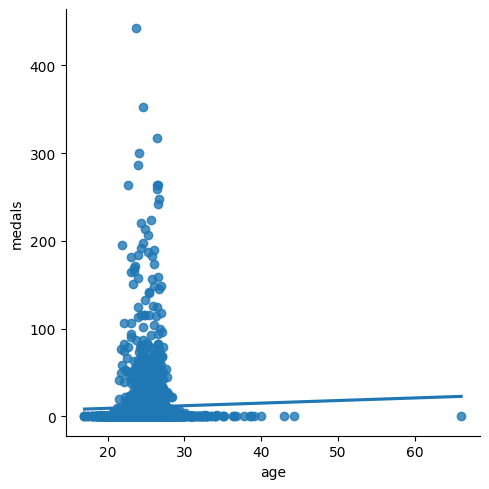

In [33]:
sns.lmplot(data=df, x='age', y='medals', ci=None)

<Axes: ylabel='Frequency'>

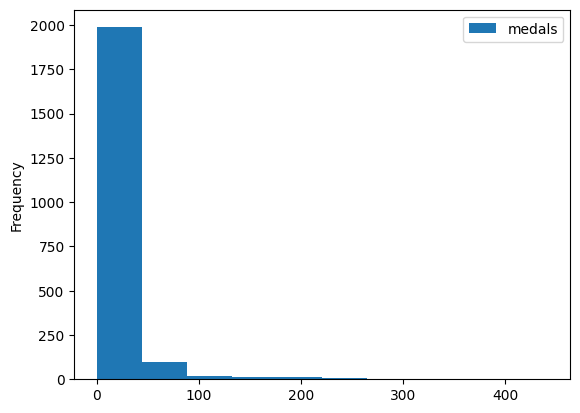

In [34]:
df.plot.hist(y='medals')

In [35]:
df[df.isnull().any(axis=1)]

,team,year,events,athletes,age,medals,prev_medals
19,ALB,1992,8,9,25.3,0,NaN
26,ALG,1964,7,7,26.0,0,NaN
39,AND,1976,2,3,28.3,0,NaN
50,ANG,1980,14,17,17.4,0,NaN
59,ANT,1976,11,17,23.2,0,NaN
...,...,...,...,...,...,...,...
2092,VIN,1988,6,6,20.5,0,NaN
2103,YAR,1984,3,3,27.7,0,NaN
2105,YEM,1992,8,8,19.6,0,NaN
2112,YMD,1988,5,5,23.6,0,NaN


In [36]:
df.dropna(inplace=True)

In [37]:
train = df[df['year'] < 2012].copy()
test = df[df['year'] >= 2012].copy()

In [39]:
train.shape

(1609, 7)

In [40]:
test.shape

(405, 7)

In [43]:
reg = LinearRegression()

In [41]:
predictors = ['athletes','prev_medals']
target = 'medals'

In [44]:
reg.fit(train[predictors], train[target])

LinearRegression()

In [45]:
predictions = reg.predict(test[predictors])


In [46]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [47]:
test['predictions'] = predictions

In [52]:
test

,team,year,events,athletes,age,medals,prev_medals,predictions
6,AFG,2012,6,6,24.8,1,1.0,0.0
7,AFG,2016,3,3,24.7,0,1.0,0.0
24,ALB,2012,9,10,25.7,0,0.0,0.0
25,ALB,2016,6,6,23.7,0,0.0,0.0
37,ALG,2012,29,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,2016,3,3,19.3,0,0.0,0.0
2131,ZAM,2012,7,7,22.6,0,0.0,0.0
2132,ZAM,2016,7,7,24.1,0,0.0,0.0
2142,ZIM,2012,8,9,27.3,0,4.0,2.0


In [49]:
test.loc[test['predictions'] < 0 , "predictions"] = 0

In [51]:
test['predictions'] = test['predictions'].round()

In [53]:
error =  mean_absolute_error(test['medals'], test['predictions'])

In [58]:
error

3.2987654320987656

In [57]:
error =  mean_squared_error(test['medals'], test['predictions'])